In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [33]:
data = 'cancer.csv'
df = pd.read_csv(data, sep=',', skiprows=14, header=0)
print(df.shape)
print(df.info())
display(df.head())

(569, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       569 non-null    int64  
 1   Diag     569 non-null    object 
 2   ave_a    569 non-null    float64
 3   ave_b    569 non-null    float64
 4   ave_c    569 non-null    float64
 5   ave_d    569 non-null    float64
 6   ave_e    569 non-null    float64
 7   ave_f    569 non-null    float64
 8   ave_g    569 non-null    float64
 9   ave_h    569 non-null    float64
 10  ave_i    569 non-null    float64
 11  ave_j    569 non-null    float64
 12  se_a     569 non-null    float64
 13  se_b     569 non-null    float64
 14  se_c     569 non-null    float64
 15  se_d     569 non-null    float64
 16  se_e     569 non-null    float64
 17  se_f     569 non-null    float64
 18  se_g     569 non-null    float64
 19  se_h     569 non-null    float64
 20  se_i     569 non-null    float64
 21  se_j  

,ID,Diag,ave_a,ave_b,ave_c,ave_d,ave_e,ave_f,ave_g,ave_h,ave_i,ave_j,se_a,se_b,se_c,se_d,se_e,se_f,se_g,se_h,se_i,se_j,worst_a,worst_b,worst_c,worst_d,worst_e,worst_f,worst_g,worst_h,worst_i,worst_j
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
dfX = df.loc[:, 'ave_a':]
n=dfX.shape[0]
p=dfX.shape[1]

print(n)
print(dfX.shape)
print(dfX.info())
display(dfX.head())

569
(569, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ave_a    569 non-null    float64
 1   ave_b    569 non-null    float64
 2   ave_c    569 non-null    float64
 3   ave_d    569 non-null    float64
 4   ave_e    569 non-null    float64
 5   ave_f    569 non-null    float64
 6   ave_g    569 non-null    float64
 7   ave_h    569 non-null    float64
 8   ave_i    569 non-null    float64
 9   ave_j    569 non-null    float64
 10  se_a     569 non-null    float64
 11  se_b     569 non-null    float64
 12  se_c     569 non-null    float64
 13  se_d     569 non-null    float64
 14  se_e     569 non-null    float64
 15  se_f     569 non-null    float64
 16  se_g     569 non-null    float64
 17  se_h     569 non-null    float64
 18  se_i     569 non-null    float64
 19  se_j     569 non-null    float64
 20  worst_a  569 non-null    float64
 21  wo

,ave_a,ave_b,ave_c,ave_d,ave_e,ave_f,ave_g,ave_h,ave_i,ave_j,se_a,se_b,se_c,se_d,se_e,se_f,se_g,se_h,se_i,se_j,worst_a,worst_b,worst_c,worst_d,worst_e,worst_f,worst_g,worst_h,worst_i,worst_j
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
sc = StandardScaler()
X_std = sc.fit_transform(dfX)*(np.sqrt(n-1))/(np.sqrt(n))
print(X_std)

[[ 1.09609953 -2.0715123   1.26881726 ...  2.2940576   2.74820411
   1.93531174]
 [ 1.82821197 -0.35332152  1.68447255 ...  1.08612862 -0.24367526
   0.28094279]
 [ 1.5784992   0.45578591  1.56512598 ...  1.95328166  1.15124203
   0.20121416]
 ...
 [ 0.70166686  2.04377549  0.67208442 ...  0.41370467 -1.10357792
  -0.31812924]
 [ 1.83672491  2.33440316  1.98078127 ...  2.28797231  1.9173959
   2.21768395]
 [-1.80681144  1.22071793 -1.81279344 ... -1.7435287  -0.04809589
  -0.75054629]]


In [36]:
n_pca = 7
pca = PCA(n_components=n_pca)
X_pca = pca.fit_transform(X_std)

In [37]:
print(X_pca.shape)
print(X_pca)

(569, 7)
[[ 9.18475521  1.94687003 -1.12217872 ... -1.19405918  1.41018488
   2.1574642 ]
 [ 2.38570263 -3.76485906 -0.52882739 ...  0.62122839  0.02863096
   0.0133524 ]
 [ 5.72885549 -1.07422859 -0.55126256 ... -0.17693023  0.54097574
  -0.66757208]
 ...
 [ 1.25507494 -1.90062436  0.56223582 ...  1.80840021 -0.53397714
  -0.19258797]
 [10.36567336  1.67054021 -1.87537916 ... -0.03371213  0.56743798
   0.22287796]
 [-5.4704299  -0.67004722  1.48913282 ... -0.18454085  1.61641553
   1.69745388]]


In [38]:
print('eigenvalues:',pca.explained_variance_)
print('eigenvectors:',pca.components_)

eigenvalues: [13.28160768  5.69135461  2.81794898  1.98064047  1.64873055  1.20735661
  0.67522011]
eigenvectors: [[ 2.18902444e-01  1.03724578e-01  2.27537293e-01  2.20994985e-01
   1.42589694e-01  2.39285354e-01  2.58400481e-01  2.60853758e-01
   1.38166959e-01  6.43633464e-02  2.05978776e-01  1.74280281e-02
   2.11325916e-01  2.02869635e-01  1.45314521e-02  1.70393451e-01
   1.53589790e-01  1.83417397e-01  4.24984216e-02  1.02568322e-01
   2.27996634e-01  1.04469325e-01  2.36639681e-01  2.24870533e-01
   1.27952561e-01  2.10095880e-01  2.28767533e-01  2.50885971e-01
   1.22904556e-01  1.31783943e-01]
 [-2.33857132e-01 -5.97060883e-02 -2.15181361e-01 -2.31076711e-01
   1.86113023e-01  1.51891610e-01  6.01653628e-02 -3.47675005e-02
   1.90348770e-01  3.66575471e-01 -1.05552152e-01  8.99796818e-02
  -8.94572342e-02 -1.52292628e-01  2.04430453e-01  2.32715896e-01
   1.97207283e-01  1.30321560e-01  1.83848000e-01  2.80092027e-01
  -2.19866379e-01 -4.54672983e-02 -1.99878428e-01 -2.193518

In [39]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_) 
print(loadings)

[[ 7.97766754e-01 -5.57902673e-01 -1.43211828e-02  5.82770030e-02
   4.85187649e-02  2.05923060e-02 -1.01965685e-01]
 [ 3.78013231e-01 -1.42438189e-01  1.08358294e-01 -8.48703802e-01
  -6.35194368e-02 -3.53580239e-02  9.36718767e-03]
 [ 8.29235547e-01 -5.13348709e-01 -1.56355463e-02  5.90850159e-02
   4.79901419e-02  1.90184469e-02 -9.40679349e-02]
 [ 8.05392800e-01 -5.51269546e-01  4.81771688e-02  7.52001791e-02
   1.32656160e-02 -2.07429922e-03 -4.24443432e-02]
 [ 5.19653028e-01  4.44001652e-01 -1.75072187e-01  2.24307698e-01
  -4.68784263e-01 -3.14667652e-01 -1.15590207e-01]
 [ 8.72050110e-01  3.62361133e-01 -1.24375650e-01  4.47461790e-02
   1.50282350e-02 -1.55270604e-02  2.54059883e-02]
 [ 9.41713165e-01  1.43533860e-01  4.58922467e-03  2.69124520e-02
   1.10908534e-01 -1.02673728e-02 -8.83514518e-02]
 [ 9.50653874e-01 -8.29432966e-02 -4.29128709e-02  9.19506916e-02
  -5.63188312e-02 -5.71923814e-02 -1.23653728e-01]
 [ 5.03534839e-01  4.54106689e-01 -6.75497655e-02  9.44684980e-0

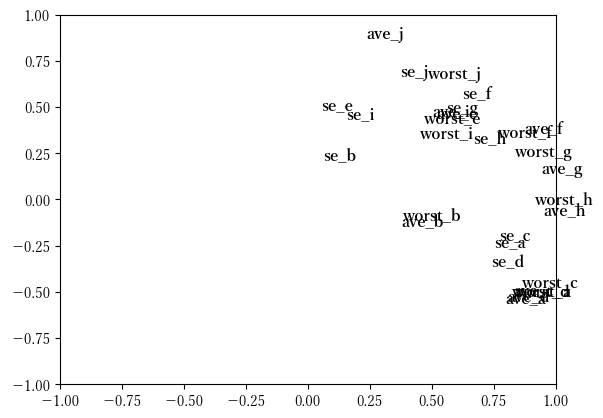

In [40]:
font = {'family' : 'Yu Mincho'}
plt.rc('font', **font)

plt.xlim(-1,1)
plt.ylim(-1,1)
for i in range(p):
    plt.text(loadings[i,0],loadings[i,1], str(dfX.columns[i]),fontdict={'weight':'bold','size':12})

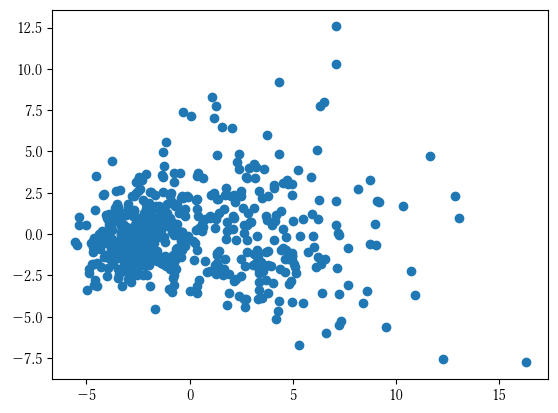

In [41]:
plt.scatter(X_pca[:,0],X_pca[:,1])

In [42]:
print("各主成分ごとの寄与率：",pca.explained_variance_ratio_)
print("各主成分までの累積寄与率：",np.cumsum(pca.explained_variance_ratio_))

各主成分ごとの寄与率： [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734]
各主成分までの累積寄与率： [0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953 ]


**Ans.2: 3**

Text(0.5, 0, 'Principal components')

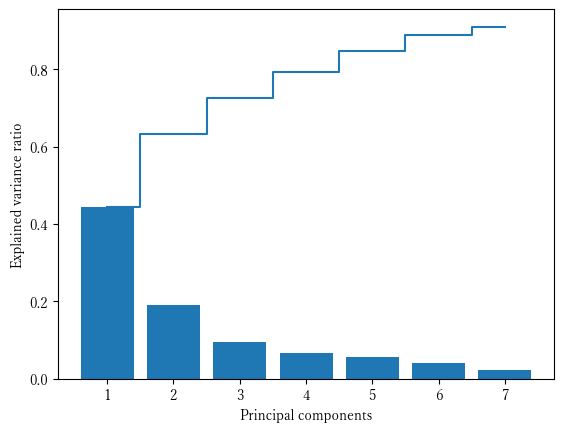

In [43]:
xx = range(1, n_pca+1)
plt.bar(xx, pca.explained_variance_ratio_)
plt.step(xx, np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

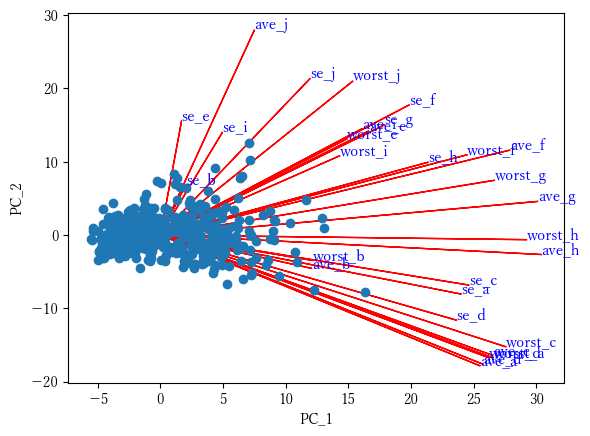

In [44]:
def biplot(X_2d, coef_2d, coef_labels=None):
    r1 = 32
    r2 = 1
    coef_2dT = coef_2d.T
    if coef_labels is None:
        coef_labels = range(len(coef_2dT))
    for i, coef in enumerate(coef_2dT):
        plt.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        plt.text(coef[0]*r1*r2, coef[1]*r1*r2, coef_labels[i],
                color='b', fontsize=11)
    plt.scatter(X_2d[:,0], X_2d[:,1])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    return None

biplot(X_pca[:, :2], loadings.T, coef_labels=dfX.columns)

In [45]:
ser_class = df['Diag']
print(ser_class.value_counts())

Diag
B    357
M    212
Name: count, dtype: int64


**Ans.1: B:357, M:212**  

In [46]:
classes = ser_class.unique()
print(classes)
colors = ['blue', 'red']

['M' 'B']


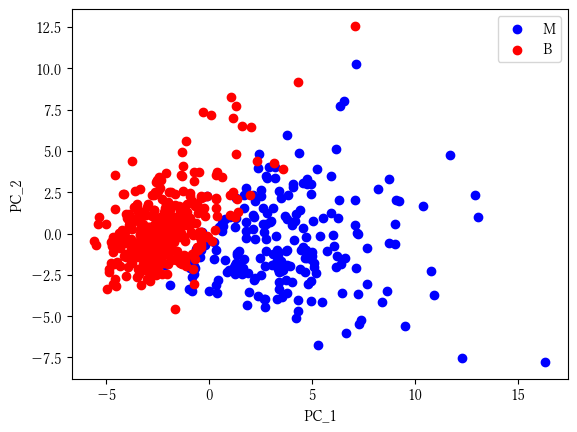

In [47]:
pca_x = X_pca[:, 0]
pca_y = X_pca[:, 1]
for i in range(len(classes)):
    cls = classes[i]
    c = colors[i]
    plt.scatter(pca_x[ser_class==cls], pca_y[ser_class==cls],
                c=c, label=cls)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.legend()